In [50]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [51]:
raw= cv2.imread("inside-the-box.jpg")
image = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)


log transformation

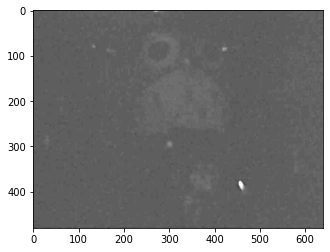

In [52]:
image_log = image_gray
c = 100/ np.log(1 + np.max(image_log))
log_image = c * (np.log(image_log + 1))
log_image = np.array(log_image, dtype = np.uint8)
plt.imshow(log_image, cmap='gray')

Power

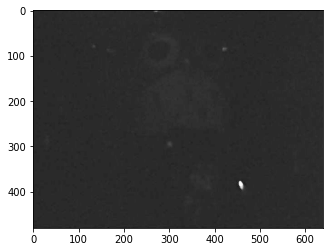

In [53]:
gamma = 0.5
gamma_corrected = np.array(255*(image_gray / 255) ** gamma, dtype = 'uint8')
plt.imshow(gamma_corrected, cmap='gray', vmin=0, vmax=255)

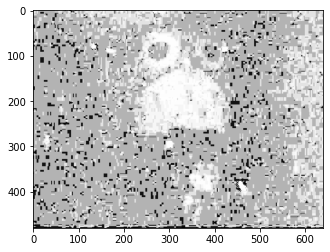

In [54]:
image_hist = gamma_corrected
hist, bins = np.histogram(image_hist.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
image_histt = cdf[image_hist]

plt.imshow(image_histt, cmap='gray', vmin=0, vmax=255)

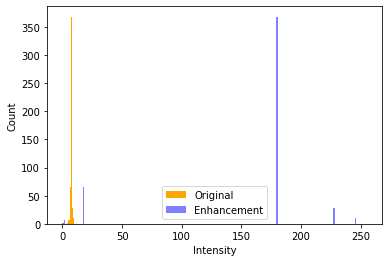

In [55]:
image_plot = image_histt
range = [0, 255]

_ = plt.hist(image_gray[:, 0], bins = 256, color = 'orange', range=range)
_ = plt.hist(image_plot[:, 0].ravel(), bins = 256, color = 'blue', alpha = 0.5, range=range)
_ = plt.xlabel('Intensity')
_ = plt.ylabel('Count')
_ = plt.legend(['Original', 'Enhancement'])
plt.show()